<a href="https://colab.research.google.com/github/advaitds2021/Cureya-Internship/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 6: FRAUD DETECTION USING SELF ORGANIZING MAPS(SOM)**

### **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show
from keras.models import Sequential
from keras.layers import Dense

### **1. Download Dataset and print first five rows**

In [ ]:
uploaded = files.upload()


Saving Credit_Card_Applications.csv to Credit_Card_Applications (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Credit_Card_Applications.csv']))
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### **Data Dictionary:**
CustomerID – Id of the customer

A1 – categorical, possible values: 0 and 1

A2 – continuous

A3 – continuous

A4 – categorical, possible values: 1, 2 and 3

A5 – categorical, possible values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14

A6 – categorical, possible values: 1, 2, 3, 4, 5, 6, 7, 8, 9

A7 – continuous

A8 – categorical, possible values: 0 and 1

A9 – categorical, possible values: 0 and 1

A10 – continuous

A11 – categorical, possible values: 0 and 1

A12 – categorical, possible values: 1, 2 and 3

A13 – continuous

A14 – continuous

A15 (Class) – class attribute, possible values: 1 and 2

### **2. Predict the fraudster**

In [ ]:
#Split the dataset into independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
#Apply Transformation on independent features
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)


Transformed values of X:
 [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [ ]:
#Install Self Organizing Maps(SOM) package
!pip install minisom


  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=744004435cc3c728070484d7553ed0131b1d7d5b6722cf164d85152f81794321
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [ ]:
# Train the SOM model
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

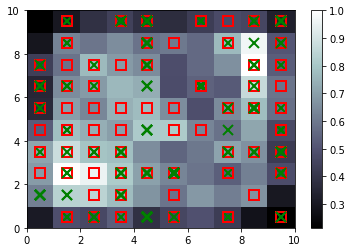

In [ ]:
# Visualize SOM
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

**Inferences from visualization of SOM:**
1. Winning maps are the white blocks in the visualization plotted above
2. White blocks shows the potential fraud customers

In [ ]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)

# mappings[(x,y)], here x & y are the coordinates of the white blocks in the winning maps.
# axis=0 will arrange the concatinated winning blocks one below other i.e. in vertical order.
frauds = np.concatenate((mappings[(1,6)], mappings[(5,5)], mappings[(1,7)]), axis=0)
# get the original values in the dataset
frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(7, 0): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
       0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.07      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
       0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,


In [ ]:
customers = df.iloc[:,1:].values
is_fraud = np.zeros(len(df))
for i in range(len(df)):
  if df.iloc[i,0] in frauds:
    is_fraud[i]= 1

In [ ]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer='uniform',activation='relu',input_dim= 15))
classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics=['accuracy'])
classifier.fit(customers,is_fraud, batch_size=1, epochs=20)
y_pred = classifier.predict(customers)
y_pred = np.concatenate((df.iloc[:,0:1].values, y_pred),axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/20
690/690 [==============================] - 1s 1ms/step - loss: 0.1544 - accuracy: 0.9826
Epoch 2/20
690/690 [==============================] - 1s 1ms/step - loss: 0.1014 - accuracy: 0.9870
Epoch 3/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0886 - accuracy: 0.9870
Epoch 4/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0823 - accuracy: 0.9870
Epoch 5/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9870
Epoch 6/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0753 - accuracy: 0.9870
Epoch 7/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0720 - accuracy: 0.9870
Epoch 8/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0732 - accuracy: 0.9870
Epoch 9/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0731 - accuracy: 0.9870
Epoch 10/20
690/690 [==============================] - 1s 1ms/step - loss: 0.0732 - accuracy: 0.9870

### **3. Print the Customer id with Probability of Fraudster**

In [ ]:
df_fraud_prob = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df_fraud_prob

,Customers,Fraud_probability
0,15598802.0,0.000000e+00
1,15790113.0,0.000000e+00
2,15762716.0,0.000000e+00
3,15664615.0,9.262126e-29
4,15708714.0,1.158237e-24
...,...,...
685,15659100.0,1.789740e-01
686,15768474.0,2.365760e-01
687,15706762.0,2.730699e-01
688,15788215.0,3.330614e-01
